Perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.lr = learning_rate
        self.epochs = epochs
        self.errors = []
        self.weights_history = []

    def activation(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)  # +1 for bias
        for epoch in range(self.epochs):
            total_error = 0
            weight_epoch = self.weights.copy()
            for xi, target in zip(X, y):
                xi_aug = np.insert(xi, 0, 1)  # Add bias input = 1
                linear_output = np.dot(xi_aug, self.weights)
                y_pred = self.activation(linear_output)
                error = target - y_pred
                self.weights += self.lr * error * xi_aug
                total_error += abs(error)
            self.errors.append(total_error)
            self.weights_history.append(self.weights.copy())

    def predict(self, X):
        X_aug = np.c_[np.ones(X.shape[0]), X]
        return np.array([self.activation(np.dot(xi, self.weights)) for xi in X_aug])

In [ ]:
# Define inputs and outputs for AND and OR gates
X = np.array([[0,0], [0,1], [1,0], [1,1]])

y_and = np.array([0, 0, 0, 1])  # AND gate
y_or = np.array([0, 1, 1, 1])   # OR gate

# Initialize and train perceptron for AND
p_and = Perceptron(learning_rate=0.1, epochs=10)
p_and.fit(X, y_and)

# Initialize and train perceptron for OR
p_or = Perceptron(learning_rate=0.1, epochs=10)
p_or.fit(X, y_or)


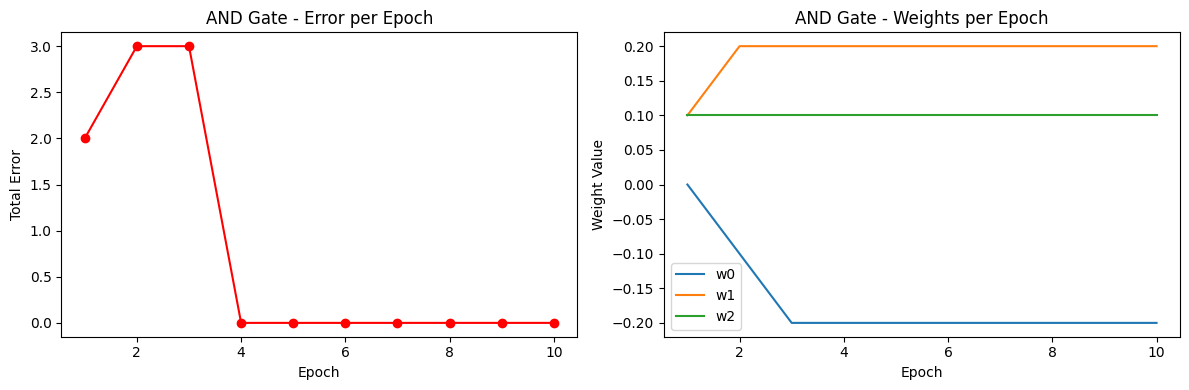

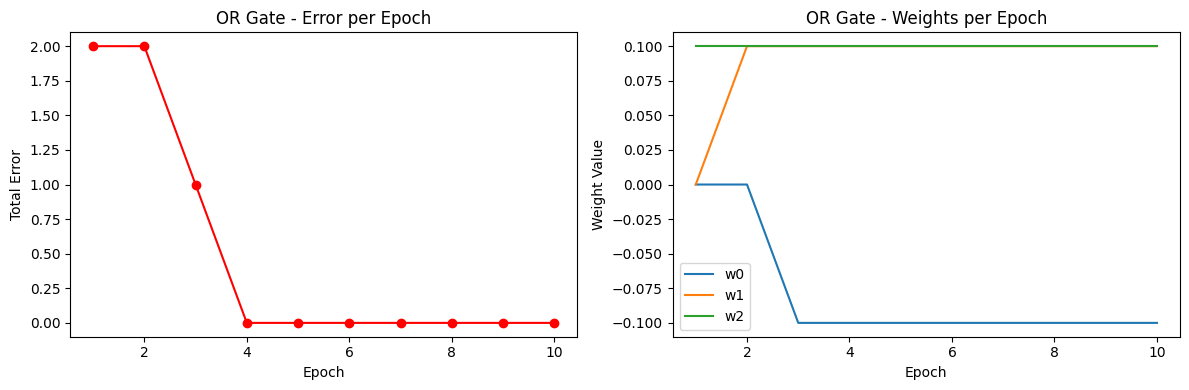

In [ ]:
def plot_learning(p, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Plot errors
    axs[0].plot(range(1, p.epochs + 1), p.errors, marker='o', color='red')
    axs[0].set_title(f'{title} - Error per Epoch')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Total Error')

    # Plot weights update
    weights_array = np.array(p.weights_history)
    for i in range(weights_array.shape[1]):
        axs[1].plot(range(1, p.epochs + 1), weights_array[:, i], label=f'w{i}')

    axs[1].set_title(f'{title} - Weights per Epoch')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Weight Value')
    axs[1].legend()
    plt.tight_layout()
    plt.show()

# Plot results
plot_learning(p_and, "AND Gate")
plot_learning(p_or, "OR Gate")


In [ ]:
print("AND Gate Predictions:")
for x, y in zip(X, p_and.predict(X)):
    print(f"Input: {x} => Output: {y}")

print("\nOR Gate Predictions:")
for x, y in zip(X, p_or.predict(X)):
    print(f"Input: {x} => Output: {y}")


AND Gate Predictions:
Input: [0 0] => Output: 0
Input: [0 1] => Output: 0
Input: [1 0] => Output: 0
Input: [1 1] => Output: 1

OR Gate Predictions:
Input: [0 0] => Output: 0
Input: [0 1] => Output: 1
Input: [1 0] => Output: 1
Input: [1 1] => Output: 1


In [ ]:
def print_epoch_details(perceptron, gate_name):
    print(f"\nTraining Summary for {gate_name.upper()} Gate:")
    print("-" * 50)
    for epoch in range(perceptron.epochs):
        weights = perceptron.weights_history[epoch]
        error = perceptron.errors[epoch]
        weight_str = ', '.join([f"w{i}={w:.2f}" for i, w in enumerate(weights)])
        print(f"Epoch {epoch+1:2d}: {weight_str} | Error = {error}")


In [ ]:
print_epoch_details(p_and, "AND")
print_epoch_details(p_or, "OR")



Training Summary for AND Gate:
--------------------------------------------------
Epoch  1: w0=0.00, w1=0.10, w2=0.10 | Error = 2
Epoch  2: w0=-0.10, w1=0.20, w2=0.10 | Error = 3
Epoch  3: w0=-0.20, w1=0.20, w2=0.10 | Error = 3
Epoch  4: w0=-0.20, w1=0.20, w2=0.10 | Error = 0
Epoch  5: w0=-0.20, w1=0.20, w2=0.10 | Error = 0
Epoch  6: w0=-0.20, w1=0.20, w2=0.10 | Error = 0
Epoch  7: w0=-0.20, w1=0.20, w2=0.10 | Error = 0
Epoch  8: w0=-0.20, w1=0.20, w2=0.10 | Error = 0
Epoch  9: w0=-0.20, w1=0.20, w2=0.10 | Error = 0
Epoch 10: w0=-0.20, w1=0.20, w2=0.10 | Error = 0

Training Summary for OR Gate:
--------------------------------------------------
Epoch  1: w0=0.00, w1=0.00, w2=0.10 | Error = 2
Epoch  2: w0=0.00, w1=0.10, w2=0.10 | Error = 2
Epoch  3: w0=-0.10, w1=0.10, w2=0.10 | Error = 1
Epoch  4: w0=-0.10, w1=0.10, w2=0.10 | Error = 0
Epoch  5: w0=-0.10, w1=0.10, w2=0.10 | Error = 0
Epoch  6: w0=-0.10, w1=0.10, w2=0.10 | Error = 0
Epoch  7: w0=-0.10, w1=0.10, w2=0.10 | Error = 0
Epoch